In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# @title Download the data

import os, requests, tarfile

fnames = ["kay_labels.npy", "kay_labels_val.npy", "kay_images.npz"]
urls = ["https://osf.io/r638s/download",
        "https://osf.io/yqb3e/download",
        "https://osf.io/ymnjv/download"]

for fname, url in zip(fnames, urls):
  if not os.path.isfile(fname):
    try:
      r = requests.get(url)
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        print(f"Downloading {fname}...")
        with open(fname, "wb") as fid:
          fid.write(r.content)
        print(f"Download {fname} completed!")

Download kay_labels.npy completed!
Download kay_labels_val.npy completed!
Download kay_images.npz completed!


In [ ]:
with np.load(fname) as dobj:
  dat = dict(**dobj)
labels = np.load('kay_labels.npy')
val_labels = np.load('kay_labels_val.npy')


`labels` is a 4 by stim array of class names:  
- row 3 has the labels predicted by a deep neural network (DNN) trained on Imagenet
- rows 0-2 correspond to different levels of the wordnet hierarchy for the DNN predictions

In [ ]:
print(labels[:, :4])
print(labels.shape)

[['artifact' 'entity' 'animal' 'animal']
 ['instrumentality' 'round shape' 'vertebrate' 'vertebrate']
 ['equipment' 'sphere' 'mammal' 'amphibian']
 ['croquet ball' 'bubble' 'komondor' 'tailed frog']]
(4, 1750)


In [ ]:
print(val_labels[:, :4])
print(val_labels.shape)

[['artifact' 'artifact' 'animal' 'animal']
 ['structure' 'covering' 'vertebrate' 'vertebrate']
 ['bridge' 'clothing' 'bird' 'mammal']
 ['steel arch bridge' 'rugby ball' 'bald eagle' 'guenon']]
(4, 120)


In [ ]:
print(dat.keys())

dict_keys(['stimuli', 'stimuli_test', 'responses', 'responses_test', 'roi', 'roi_names'])


`dat` has the following fields:  
- `stimuli`: stim x i x j array of grayscale stimulus images
- `stimuli_test`: stim x i x j array of grayscale stimulus images in the test set  
- `responses`: stim x voxel array of z-scored BOLD response amplitude
- `responses_test`:  stim x voxel array of z-scored BOLD response amplitude in the test set  
- `roi`: array of voxel labels
- `roi_names`: array of names corresponding to voxel labels

In [ ]:
print(dat["stimuli"].shape)

(1750, 128, 128)


In [ ]:
print(dat["responses"].shape)


(1750, 8428)


This is the number of voxels in each ROI. Note that `"Other"` voxels have been removed from this version of the dataset:

In [ ]:
dict(zip(dat["roi_names"], np.bincount(dat["roi"])))


{'LatOcc': 928,
 'Other': 0,
 'V1': 1294,
 'V2': 2083,
 'V3': 1790,
 'V3A': 484,
 'V3B': 314,
 'V4': 1535}

In [ ]:
stimuli= (dat["stimuli"])
print(stimuli.shape)
print(stimuli[2,75,75])

(1750, 128, 128)
-0.19245926


Each stimulus is a 128 x 128 grayscale array:

1.   List item

1.   List item
2.   List item


2.   List item



In [ ]:
Other = np.where(dat["roi"] == 0)
V1_index = np.where(dat["roi"] == 1)
V2_index = np.where(dat["roi"] == 2)
V3_index = np.where(dat["roi"] == 3)
V3A_index = np.where(dat["roi"] == 4)
V3B_index = np.where(dat["roi"] == 5)
V4_index = np.where(dat["roi"] == 6)
LatOcc_index = np.where(dat["roi"] == 7)

In [ ]:

Total_responses= dat["responses"]

V1_responses= Total_responses[:,V1_index]
V2_responses= Total_responses[:,V2_index]
V3_responses= Total_responses[:,V3_index]
V3A_responses= Total_responses[:,V3A_index]
V3B_responses= Total_responses[:,V3B_index]
V4_responses= Total_responses[:,V4_index]
LatOcc_responses= Total_responses[:,LatOcc_index]

V1_responses= np.squeeze(V1_responses)
V2_responses= np.squeeze(V2_responses)
V3_responses= np.squeeze(V3_responses)
V3A_responses= np.squeeze(V3A_responses)
V3B_responses= np.squeeze(V3B_responses)
V4_responses= np.squeeze(V4_responses)
LatOcc_responses= np.squeeze(LatOcc_responses)

print(V1_responses.shape)
print(V2_responses.shape)
print(V3_responses.shape)
print(V3A_responses.shape)
print(V3B_responses.shape)
print(V4_responses.shape)
print(LatOcc_responses.shape)

(1750, 1294)
(1750, 2083)
(1750, 1790)
(1750, 484)
(1750, 314)
(1750, 1535)
(1750, 928)


In [ ]:
correlation_v1 = np.corrcoef(V1_responses)
print(correlation_v1)
print(correlation_v1.shape)
#plt.imshow(correlation_v1, cmap='viridis')

correlation_v2 = np.corrcoef(V2_responses)
print(correlation_v2)

correlation_v3 = np.corrcoef(V3_responses)
print(correlation_v3)

correlation_v3a = np.corrcoef(V3A_responses)
print(correlation_v3)

correlation_v3b = np.corrcoef(V3B_responses)
print(correlation_v3)

correlation_v4 = np.corrcoef(V4_responses)
print(correlation_v3)

correlation_LatOcc = np.corrcoef(LatOcc_responses)
print(correlation_v3)

[[ 1.          0.07590283  0.02544403 ... -0.05765196 -0.02911249
   0.01395124]
 [ 0.07590283  1.          0.03164511 ... -0.04609637 -0.03199197
  -0.02359456]
 [ 0.02544403  0.03164511  1.         ...  0.02443561  0.00523748
   0.03958941]
 ...
 [-0.05765196 -0.04609637  0.02443561 ...  1.          0.16348038
   0.05297783]
 [-0.02911249 -0.03199197  0.00523748 ...  0.16348038  1.
   0.17105514]
 [ 0.01395124 -0.02359456  0.03958941 ...  0.05297783  0.17105514
   1.        ]]
(1750, 1750)
[[ 1.00000000e+00  9.88260286e-02  4.54190983e-02 ...  2.38147248e-02
   1.46192132e-02  3.85649297e-02]
 [ 9.88260286e-02  1.00000000e+00  3.84807924e-02 ... -3.89342198e-02
  -3.78933894e-02 -5.82967387e-02]
 [ 4.54190983e-02  3.84807924e-02  1.00000000e+00 ...  4.02826272e-02
  -2.13779817e-03  2.89170126e-02]
 ...
 [ 2.38147248e-02 -3.89342198e-02  4.02826272e-02 ...  1.00000000e+00
   1.26742540e-01 -8.93116973e-04]
 [ 1.46192132e-02 -3.78933894e-02 -2.13779817e-03 ...  1.26742540e-01
   1.000

In [ ]:
correlation_v12 = np.corrcoef(V1_responses[0],V1_responses[1] )
print(correlation_v12)

[[1.         0.07590283]
 [0.07590283 1.        ]]


In [ ]:
Total_responses= dat["responses_test"]

V1_responsesT= Total_responses[:,V1_index]
V2_responsesT= Total_responses[:,V2_index]
V3_responsesT= Total_responses[:,V3_index]
V3A_responsesT= Total_responses[:,V3A_index]
V3B_responsesT= Total_responses[:,V3B_index]
V4_responsesT= Total_responses[:,V4_index]
LatOcc_responsesT= Total_responses[:,LatOcc_index]

V1_responsesT= np.squeeze(V1_responsesT)
V2_responsesT= np.squeeze(V2_responsesT)
V3_responsesT= np.squeeze(V3_responsesT)
V3A_responsesT= np.squeeze(V3A_responsesT)
V3B_responsesT= np.squeeze(V3B_responsesT)
V4_responsesT= np.squeeze(V4_responsesT)
LatOcc_responsesT= np.squeeze(LatOcc_responsesT)

print(V1_responsesT.shape)
print(V2_responsesT.shape)
print(V3_responsesT.shape)
print(V3A_responsesT.shape)
print(V3B_responsesT.shape)
print(V4_responsesT.shape)
print(LatOcc_responsesT.shape)

(120, 1294)
(120, 2083)
(120, 1790)
(120, 484)
(120, 314)
(120, 1535)
(120, 928)


In [ ]:
correlation_v1t = 1 - np.corrcoef(V1_responsesT)
print(correlation_v1t)
print(correlation_v1t.shape)
rdm_v1= 1- correlation_v1t



[[1.11022302e-16 5.03173510e-01 4.90458923e-01 ... 9.41155186e-01
  1.00425205e+00 8.51551316e-01]
 [5.03173510e-01 0.00000000e+00 3.99453094e-01 ... 9.08938627e-01
  9.72481436e-01 6.46269898e-01]
 [4.90458923e-01 3.99453094e-01 0.00000000e+00 ... 9.63011751e-01
  9.89236550e-01 7.25347217e-01]
 ...
 [9.41155186e-01 9.08938627e-01 9.63011751e-01 ... 1.11022302e-16
  5.75335807e-01 6.43505374e-01]
 [1.00425205e+00 9.72481436e-01 9.89236550e-01 ... 5.75335807e-01
  2.22044605e-16 8.96085271e-01]
 [8.51551316e-01 6.46269898e-01 7.25347217e-01 ... 6.43505374e-01
  8.96085271e-01 0.00000000e+00]]
(120, 120)


In [ ]:
correlation_v1t = 1-np.corrcoef(V1_responsesT)
print(correlation_v1t)
print(correlation_v1t.shape)

correlation_v2t = 1-np.corrcoef(V2_responsesT)
print(correlation_v2t)

correlation_v3t = 1-np.corrcoef(V3_responsesT)
print(correlation_v3t)

correlation_v3at = np.corrcoef(V3A_responsesT)
print(correlation_v3t)

correlation_v3bt = np.corrcoef(V3B_responsesT)
print(correlation_v3t)

correlation_v4t = 1-np.corrcoef(V4_responsesT)
print(correlation_v4t)

correlation_LatOcct = 1-np.corrcoef(LatOcc_responsesT)
print(correlation_LatOcct)

[[1.11022302e-16 5.03173510e-01 4.90458923e-01 ... 9.41155186e-01
  1.00425205e+00 8.51551316e-01]
 [5.03173510e-01 0.00000000e+00 3.99453094e-01 ... 9.08938627e-01
  9.72481436e-01 6.46269898e-01]
 [4.90458923e-01 3.99453094e-01 0.00000000e+00 ... 9.63011751e-01
  9.89236550e-01 7.25347217e-01]
 ...
 [9.41155186e-01 9.08938627e-01 9.63011751e-01 ... 1.11022302e-16
  5.75335807e-01 6.43505374e-01]
 [1.00425205e+00 9.72481436e-01 9.89236550e-01 ... 5.75335807e-01
  2.22044605e-16 8.96085271e-01]
 [8.51551316e-01 6.46269898e-01 7.25347217e-01 ... 6.43505374e-01
  8.96085271e-01 0.00000000e+00]]
(120, 120)
[[0.         0.53093295 0.40608365 ... 1.01698434 0.97159415 0.99920546]
 [0.53093295 0.         0.45456323 ... 0.98446558 0.99293058 0.79043371]
 [0.40608365 0.45456323 0.         ... 1.04350135 0.96675968 1.00247416]
 ...
 [1.01698434 0.98446558 1.04350135 ... 0.         0.53795255 0.60682076]
 [0.97159415 0.99293058 0.96675968 ... 0.53795255 0.         0.90012954]
 [0.99920546 0.7904

In [ ]:

correlation_v12t = np.corrcoef(V1_responsesT[0],V1_responsesT[1] )
print(correlation_v12t)

[[1.         0.49682649]
 [0.49682649 1.        ]]


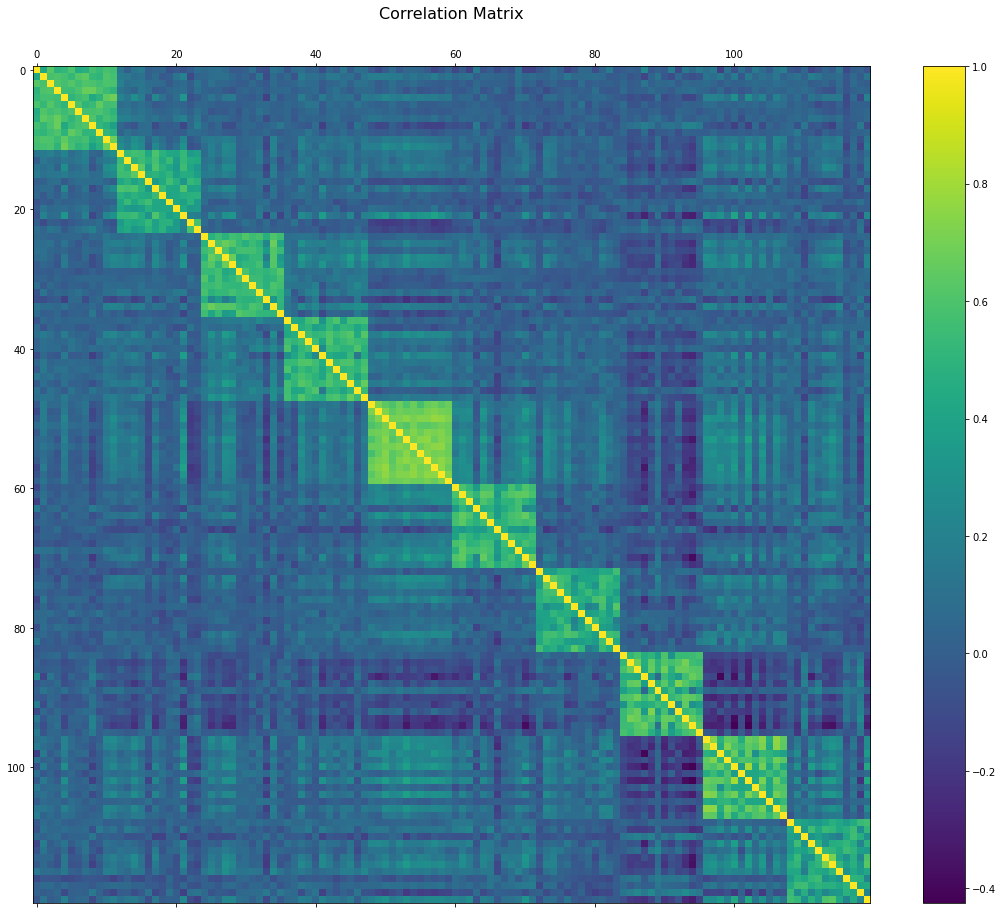

In [ ]:
import numpy as np
correlation_v1t = np.zeros([120,120])
correlation_v1t = np.corrcoef(LatOcc_responsesT)

f = plt.figure(figsize=(19, 15))
plt.matshow(correlation_v1t, fignum=f.number)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=16);




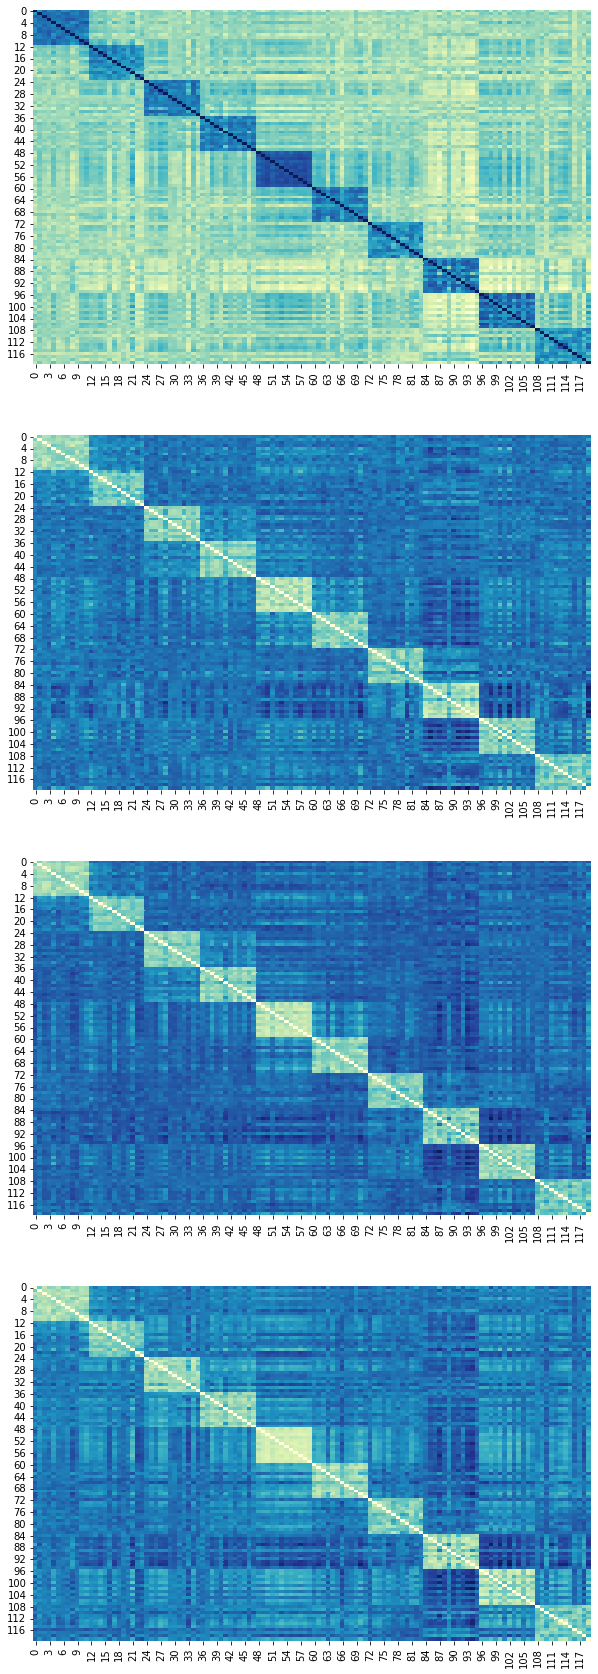

In [ ]:
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
#fig, ax = plt.subplots(2, 2, figsize=(19,15))
#var = pdist(V4_responsesT)
#sns.heatmap(ax=ax[0, 0],squareform(var))

#var = pdist(V1_responsesT)
#sns.heatmap(ax=ax[0, 0],squareform(var))


import seaborn 
import matplotlib.pyplot as plt
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
f,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,sharey=True,figsize=(10,30))
g1 = sns.heatmap(correlation_v1t,cmap="YlGnBu",cbar=False,ax=ax1)
g2 = sns.heatmap(correlation_v2t,cmap="YlGnBu",cbar=False,ax=ax2)
g3 = sns.heatmap(correlation_v4t,cmap="YlGnBu",cbar=False,ax=ax3)
g4 = sns.heatmap(correlation_LatOcct,cmap="YlGnBu",cbar=False,ax=ax4)




In [ ]:
!pip install neurora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 4.8 MB/s 
     |████████████████████████████████| 7.5 MB 20.6 MB/s 
     |████████████████████████████████| 9.6 MB 45.8 MB/s 


In [ ]:
from neurora.rdm_corr import rdm_correlation_pearson, rdm_correlation_spearman, rdm_correlation_kendall, rdm_distance,rdm_similarity

x = rdm_correlation_spearman(correlation_v1t, correlation_v2t, rescale=False)
print(x)
x = rdm_correlation_spearman(correlation_v1t, correlation_v4t, rescale=False)
print(x)
x = rdm_correlation_spearman(correlation_v1t, correlation_LatOcct, rescale=False)
print(x)
x = rdm_correlation_spearman(correlation_v2t, correlation_LatOcct, rescale=False)
print(x)
x = rdm_correlation_spearman(correlation_v4t, correlation_LatOcct, rescale=False)
print(x)
x = rdm_correlation_spearman(correlation_v2t, correlation_v4t, rescale=False)
print(x)

1.5625440484552224
[-0.59023217  0.        ]
[-0.77014026  0.        ]
[-1.  0.]
[0.59023217 0.        ]
[0.77014026 0.        ]
[0.70190994 0.        ]


In [ ]:
x

array([0.70190994, 0.        ])

In [ ]:
from scipy.stats import spearmanr
from scipy import stats
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(correlation_v1t, correlation_v4t)
stats.spearmanr(correlation_v1t, correlation_v4t, axis=None)

SpearmanrResult(correlation=-0.775838637815164, pvalue=0.0)

In [ ]:
type(correlation_v1t)

numpy.ndarray

In [ ]:
print(p)

[[0.00000000e+00 1.91536953e-01 1.84775824e-25 ... 1.01943751e-01
  8.55253032e-01 1.63074614e-04]
 [1.91536953e-01 0.00000000e+00 5.69633365e-06 ... 6.75364455e-01
  5.17601313e-04 2.57078590e-06]
 [1.84775824e-25 5.69633365e-06 0.00000000e+00 ... 9.58212949e-01
  8.81205671e-01 1.85828703e-01]
 ...
 [1.01943751e-01 6.75364455e-01 9.58212949e-01 ... 0.00000000e+00
  2.58472197e-07 1.82885606e-06]
 [8.55253032e-01 5.17601313e-04 8.81205671e-01 ... 2.58472197e-07
  0.00000000e+00 1.31592601e-02]
 [1.63074614e-04 2.57078590e-06 1.85828703e-01 ... 1.82885606e-06
  1.31592601e-02 0.00000000e+00]]


In [ ]:
for i in range(120):
  print(val_labels[0,i]+"\t\t" +val_labels[1,i] +"\t\t"+val_labels[2,i] +"\t\t"+val_labels[3,i])


artifact		structure		bridge		steel arch bridge
artifact		covering		clothing		rugby ball
animal		vertebrate		bird		bald eagle
animal		vertebrate		mammal		guenon
artifact		shore		lakeside		lakeside
animal		vertebrate		mammal		titi
animal		vertebrate		amphibian		common newt
artifact		covering		clothing		trench coat
animal		vertebrate		mammal		ox
animal		vertebrate		mammal		gorilla
artifact		structure		building		palace
geological formation		shore		seashore		seashore
geological formation		shore		lakeside		lakeside
artifact		instrumentality		equipment		ping-pong ball
geological formation		vertebrate		mammal		valley
animal		vertebrate		reptile		king snake
animal		vertebrate		mammal		tiger
artifact		instrumentality		furnishing		folding chair
artifact		covering		protective covering		fire screen
artifact		instrumentality		device		strainer
artifact		instrumentality		equipment		croquet ball
artifact		covering		clothing		vestment
animal		vertebrate		reptile		garter snake
artifact		structure		column

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
fig, ax = plt.subplots()

layers_model1 = ['layer_1', 'layer_2', 'layer_3', 'layer_4']


V1_responsesT= np.squeeze(V1_responsesT)
V2_responsesT= np.squeeze(V2_responsesT)
V3_responsesT= np.squeeze(V3_responsesT)
V3A_responsesT= np.squeeze(V3A_responsesT)
V3B_responsesT= np.squeeze(V3B_responsesT)
V4_responsesT= np.squeeze(V4_responsesT)


V1_responses
col_labels = 
row_labels = layers_model1
im, cbar = heatmap(RSA_model_comparison_table, row_labels, col_labels, ax=ax,
            cbar_kw={}, cbarlabel="RSA correlation",cmap='viridis')
annotate_heatmap(im,RSA_model_comparison_table)
fig.tight_layout()
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.ylabel('model1')
plt.xlabel('model2')
plt.title("RSA results", y=-0.24)
plt.show()


SyntaxError: ignored

In [ ]:
dict(zip(dat["roi_names"], np.bincount(dat["roi"])))

In [ ]:
print(dat["roi_names"])

In [ ]:
V1_responses = np.squeeze(V1_responses)
print(V1_responses.shape)



Each stimulus is a 128 x 128 grayscale array:

Each stimulus is a 128 x 128 grayscale array:

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6), sharex=True, sharey=True)
for ax, im, lbl in zip(axs.flat, dat["stimuli"], labels[-1, :]):
  ax.imshow(im, cmap="gray")
  ax.set_title(lbl)
fig.tight_layout()
fig.show()

Each stimulus is associated with a pattern of BOLD response across voxels in visual cortex:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="Stimulus")
heatmap = ax.imshow(dat["responses"],
                    aspect="auto", vmin=-1, vmax=1, cmap="bwr")
fig.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
fig.tight_layout()
fig.show()

The training/validation splits from the 

---

original paper are retained, so the 120 

---

test stimuli and responses are in separate data structures:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 2.5))
ax.set(xlabel="Voxel", ylabel="Test Stimulus")
heatmap = ax.imshow(dat["responses_test"],
                    aspect="auto", vmin=-1, vmax=1, cmap="bwr")
fig.colorbar(heatmap, shrink=.75, label="Response amplitude (Z)")
fig.tight_layout()
fig.show()

In [ ]:
import numpy as np
correlation_v1 = np.zeros([1750,1750])
for i in range(1750):
  for j in range(1750):
    correlation_v1[i][j] = np.corrcoef(V1_responses[i],V1_responses[i])

In [ ]:
correlation_v1 = np.zeros([1750,1750])

In [ ]:
V1_responses[0].shape

In [ ]:
import numpy as np
correlation_v1 = np.zeros([1750,1750])
correlation_v1 = np.corrcoef(V1_responses)
print(correlation_v1)

correlation_v2 = np.zeros([1750,1750])
correlation_v2 = np.corrcoef(V2_responses)
print(correlation_v2)



In [ ]:
z = np.squeeze(V1_responses[0])

import numpy as np
V1_responses = list(V1_responses)
correlation_v1 = np.zeros([1750,1750])
print(correlation_v1.shape)
for i in range(1750):
      print(np.corrcoef(V1_responses,V1_responses))
plt.imshow(correlation_v1, cmap='RdBu')


In [ ]:
z.shape
j = z.tolist()

In [ ]:
type(j)

In [ ]:
j = np.array(j)

In [ ]:
j.shape()

In [ ]:
type(z)

In [ ]:
a=[[1,4,6],[0,3,5]]
b=[[1,2,3],[1,1,1]]
y = np.corrcoef(a,b)

In [ ]:
y

In [ ]:
V1_responses[0]

In [ ]:
v1_dcnn = np.load('geekfile.npz')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
from google.colab import files

files.upload()

In [ ]:
from neurora.rdm_corr import rdm_correlation_pearson, rdm_correlation_spearman, rdm_correlation_kendall, rdm_distance,rdm_similarity

x = rdm_correlation_spearman(correlation_v1t, correlation_v2t, rescale=False)
print(x)
x = rdm_correlation_spearman(correlation_v1t, correlation_v4t, rescale=False)
print(x)
x = rdm_correlation_spearman(correlation_v1t, correlation_LatOcct, rescale=False)
print(x)
x = rdm_correlation_spearman(correlation_v2t, correlation_LatOcct, rescale=False)
print(x)
x = rdm_correlation_spearman(correlation_v4t, correlation_LatOcct, rescale=False)
print(x)